# LDSC in gwaslab

In [8]:
import gwaslab as gl

In [9]:
gl.show_version()

2025/12/26 11:46:12 GWASLab v4.0.0 https://cloufield.github.io/gwaslab/
2025/12/26 11:46:12 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/12/26 11:46:12 Python version: 3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:43:22) [GCC 12.3.0]


## Loading and filter in only Hapmap3 SNPs

In [10]:
t2d = gl.Sumstats("../0_sample_data/t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             build="19",             
             n="N", verbose=False)
t2d.basic_check(verbose=False)

,SNPID,CHR,POS,EA,NEA,STATUS,BETA,SE,P,DIRECTION,N
0,1:725932_G_A,1,725932,G,A,1960099,-0.0737,0.1394,0.5970,-?+-,166718
1,1:725933_A_G,1,725933,G,A,1960099,0.0737,0.1394,0.5973,+?-+,166718
2,1:737801_T_C,1,737801,C,T,1960099,0.0490,0.1231,0.6908,+?-+,166718
3,1:749963_T_TAA,1,749963,TAA,T,1960399,0.0213,0.0199,0.2846,-?++,166718
4,1:751343_T_A,1,751343,T,A,1960099,0.0172,0.0156,0.2705,-?++,166718
...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,23,154874837,G,A,1960099,-0.0064,0.0117,0.5840,-+-+,191764
12557757,X:154875192_GTACTC_G,23,154875192,GTACTC,G,1960399,0.0071,0.0122,0.5612,+-+-,191764
12557758,X:154879115_A_G,23,154879115,G,A,1960099,-0.0070,0.0122,0.5646,-+-+,191764
12557759,X:154880669_T_A,23,154880669,T,A,1960099,0.0071,0.0122,0.5618,+-+-,191764


In [11]:
t2d.filter_hapmap3(inplace=True)

2025/12/26 11:47:07  -Genomic coordinates are based on GRCh37/hg19...
2025/12/26 11:47:07 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/26 11:47:07  -Loading Hapmap3 variants from built-in datasets...
2025/12/26 11:47:08  -Since rsID not in sumstats, CHR:POS( build 19) will be used for matching...
2025/12/26 11:47:10  -Checking if alleles are same...
2025/12/26 11:47:10  -Variants with macthed alleles: 1092430
2025/12/26 11:47:10  -Raw input contains 1092430 Hapmap3 variants based on CHR:POS...
2025/12/26 11:47:10 Finished extracting HapMap3 SNPs.


## Heritability estimation

In [12]:
# available since v3.4.39
t2d.estimate_h2_by_ldsc(ref_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/", 
                         w_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/")

2025/12/26 11:47:11  -Genomic coordinates are based on GRCh37/hg19...
2025/12/26 11:47:11 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/26 11:47:11  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 105.20 MB
2025/12/26 11:47:11  -Loading Hapmap3 variants from built-in datasets...
2025/12/26 11:47:11  -rsID will be used for matching...
2025/12/26 11:47:12  -Raw input contains 1213752 Hapmap3 variants based on rsID...
2025/12/26 11:47:12  -Checking if alleles are same...
2025/12/26 11:47:13  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/12/26 11:47:13 Finished extracting HapMap3 SNPs.
2025/12/26 11:47:13 Start to run LD score regression ...(v4.0.0)
2025/12/26 11:47:13  -Current Dataframe shape : 1213752 x 13 ; Memory usage: 125.56 MB
2025/12/26 11:47:13  -Run single variate LD score regression:
2025/12/26 11:47:13   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/12/26 11:47:13   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Di

In [13]:
t2d.ldsc_h2

,h2_obs,h2_se,Lambda_gc,Mean_chi2,Intercept,Intercept_se,Ratio,Ratio_se,Catagories
0,0.10394433,0.00650644,1.32982693,1.49125406,1.09147712,0.01056279,0.18621142,0.02150169,NA


## Genetic correlation

In [14]:
bmi_female = gl.Sumstats("../0_sample_data/bbj_bmi_female.txt.gz",fmt="auto",ea="REF",nea="ALT",rsid="SNP",n=70000, sep="\t",build="19",verbose=False)
bmi_male = gl.Sumstats("../0_sample_data/bbj_bmi_male.txt.gz",fmt="auto",ea="REF",nea="ALT",rsid="SNP",n=80000,sep="\t",build="19",verbose=False)

- other_traits : a list of gl.Sumstats object
- rg : alias for each trait including the main trait

In [15]:
# available since v3.4.39
t2d.estimate_rg_by_ldsc(other_traits=[bmi_female,bmi_male], 
                               rg="T2D,BMI_female,BMI_male",
                               ref_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/", 
                               w_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/")

2025/12/26 11:47:32  -Genomic coordinates are based on GRCh37/hg19...
2025/12/26 11:47:32 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/26 11:47:32  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 105.20 MB
2025/12/26 11:47:32  -Loading Hapmap3 variants from built-in datasets...
2025/12/26 11:47:33  -rsID will be used for matching...
2025/12/26 11:47:34  -Raw input contains 1213752 Hapmap3 variants based on rsID...
2025/12/26 11:47:34  -Checking if alleles are same...
2025/12/26 11:47:35  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/12/26 11:47:35 Finished extracting HapMap3 SNPs.
2025/12/26 11:47:35 Start to run LD score regression for genetic correlation ...(v4.0.0)
2025/12/26 11:47:35  -Current Dataframe shape : 1213752 x 13 ; Memory usage: 125.56 MB
2025/12/26 11:47:35  -Run cross-trait LD score regression:
2025/12/26 11:47:35   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/12/26 11:47:35   -Please cite LDSC: Bulik-Sullivan, B., et a

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,T2D,BMI_female,0.320668,0.062279,5.148882,2.620433e-07,0.193199,0.012133,1.030609,0.010226,0.019184,0.009454
1,T2D,BMI_male,0.209849,0.060088,3.492357,4.787786e-04,0.175952,0.011384,1.047687,0.010717,0.005353,0.011893


In [16]:
t2d.ldsc_rg

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,T2D,BMI_female,0.320668,0.062279,5.148882,2.620433e-07,0.193199,0.012133,1.030609,0.010226,0.019184,0.009454
1,T2D,BMI_male,0.209849,0.060088,3.492357,4.787786e-04,0.175952,0.011384,1.047687,0.010717,0.005353,0.011893


### visualization using plot_rg

2025/12/26 11:47:51 Start to create ldsc genetic correlation heatmap...
2025/12/26 11:47:51 Configured plot style for plot_rg:None
2025/12/26 11:47:51 Raw dataset records: 2
2025/12/26 11:47:51  -Raw dataset non-NA records: 2
2025/12/26 11:47:51 Filling diagnal line and duplicated pair for plotting...
2025/12/26 11:47:51 Valid unique trait pairs: 2
2025/12/26 11:47:51  -Valid unique trait1: 1
2025/12/26 11:47:51  -Valid unique trait2: 2
2025/12/26 11:47:51  -Significant correlations with P < 0.05: 2
2025/12/26 11:47:51  -Significant correlations after Bonferroni correction: 2
2025/12/26 11:47:51  -Significant correlations with FDR <0.05: 2
2025/12/26 11:47:51 Plotting heatmap...
2025/12/26 11:47:51 Full cell : fdr-corrected P == 0.05
2025/12/26 11:47:51 P value annotation text (Order: Bon -> FDR -> Pnom): 
2025/12/26 11:47:51  -* : non-corrected P < 0.05 
2025/12/26 11:47:51  -** : fdr-corrected P < 0.05 
2025/12/26 11:47:51  -*** : bon-corrected P < 0.05 
2025/12/26 11:47:51 Finished 

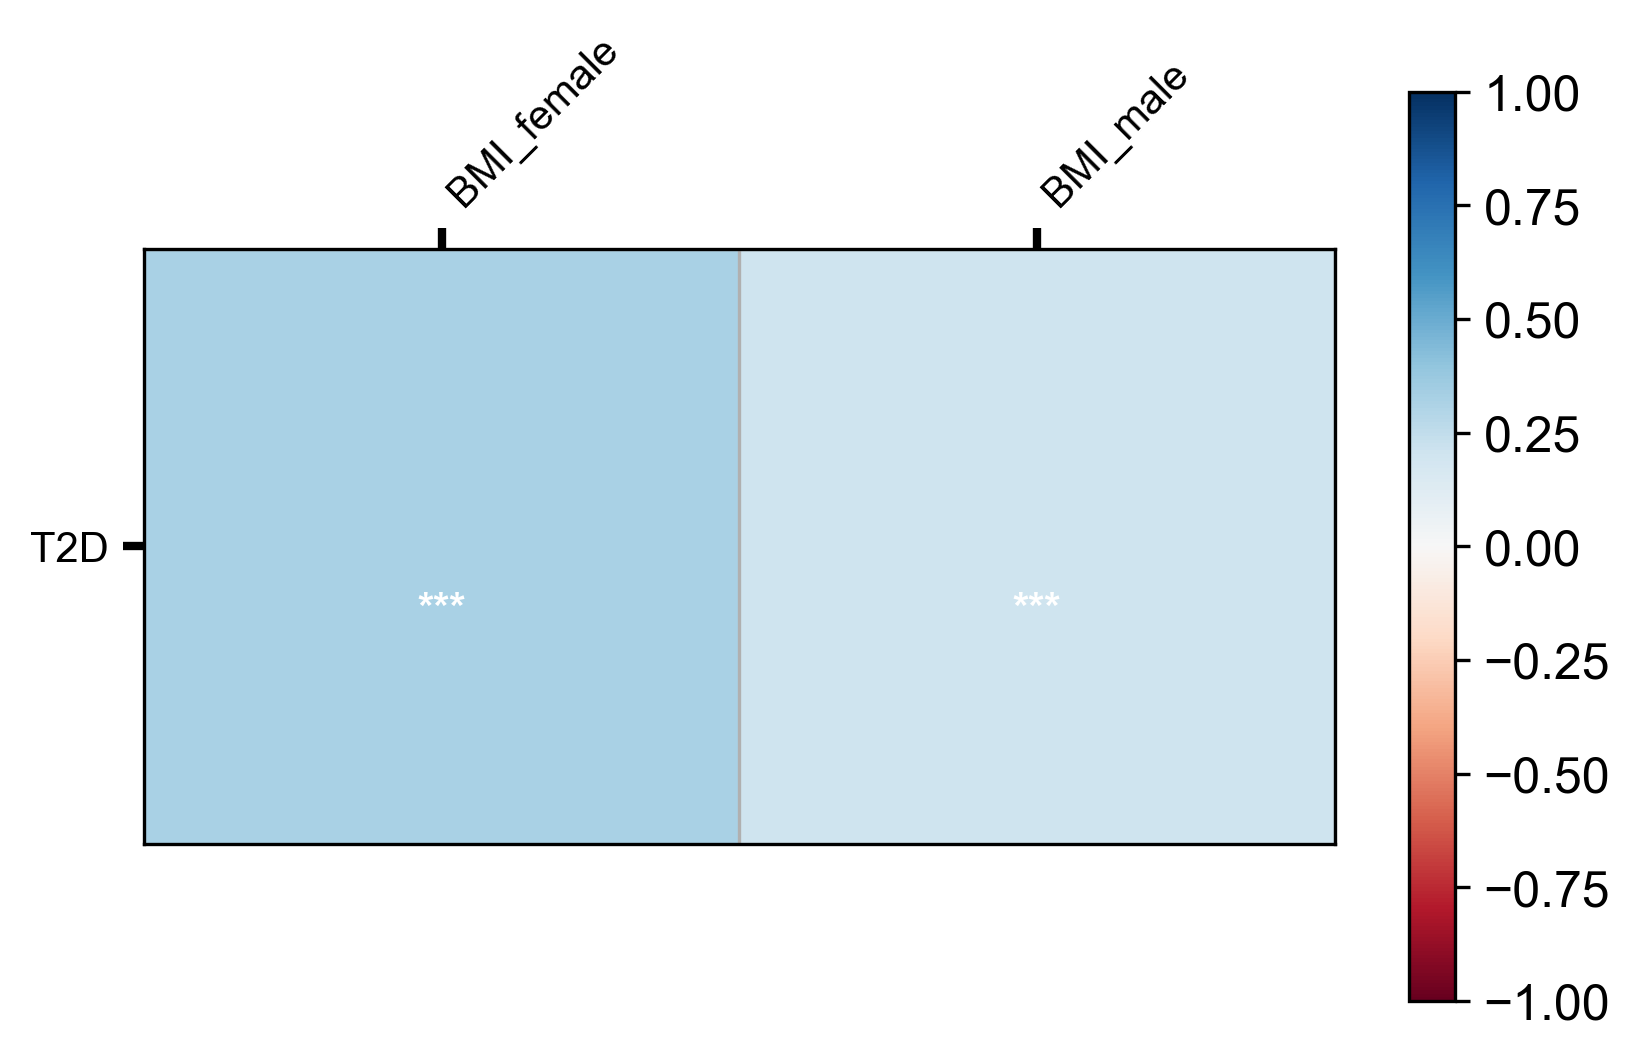

In [17]:
fig, ax, log, df = gl.plot_rg(t2d.ldsc_rg)

## Partitioned h2

In [18]:
# available since v3.4.40
t2d.estimate_partitioned_h2_by_ldsc(       ref_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_baseline/baselineLD2_2/baselineLD.", 
                               w_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_weights/weights.EAS.hm3_noMHC.",
                               frqfile_chr= "/home/yunye/tools/ldsc/ldscores/eas_frq/1000G.EAS.QC.",
                               overlap_annot = True, 
                               print_coefficients = True, 
                               print_delete_vals=True)

2025/12/26 11:47:51  -Genomic coordinates are based on GRCh37/hg19...
2025/12/26 11:47:51 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/26 11:47:51  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 105.20 MB
2025/12/26 11:47:51  -Loading Hapmap3 variants from built-in datasets...
2025/12/26 11:47:52  -rsID will be used for matching...
2025/12/26 11:47:53  -Raw input contains 1213752 Hapmap3 variants based on rsID...
2025/12/26 11:47:53  -Checking if alleles are same...
2025/12/26 11:47:54  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/12/26 11:47:54 Finished extracting HapMap3 SNPs.
2025/12/26 11:47:54 Start to run LD score regression ...(v4.0.0)
2025/12/26 11:47:54  -Run partitioned LD score regression:
2025/12/26 11:47:54   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/12/26 11:47:54   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Distinguishes Confounding from Polygenicity in Genome-Wide Association Studies. Nature Genet

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score
0,baseL2_0,1.000000,1.000000,0.000000,1.000000,0.000000,NA,-1.927388e-08,1.156327e-08,-1.666820
1,Coding_UCSC.bedL2_0,0.014196,0.068254,0.034691,4.808050,2.443726,0.118872,-2.544919e-08,9.348275e-08,-0.272234
2,Coding_UCSC.bed.flanking.500L2_0,0.049260,0.072198,0.047989,1.465653,0.974189,0.631156,-9.865231e-09,2.466959e-08,-0.399894
3,Conserved_LindbladToh.bedL2_0,0.024551,0.088877,0.057129,3.620093,2.326953,0.250205,2.010761e-08,9.386840e-08,0.214211
4,Conserved_LindbladToh.bed.flanking.500L2_0,0.305295,0.649833,0.100456,2.128542,0.329046,0.001299,-5.694877e-09,1.189500e-08,-0.478762
...,...,...,...,...,...,...,...,...,...,...
92,Ancient_Sequence_Age_Human_EnhancerL2_0,0.005145,0.078218,0.024054,15.202940,4.675287,0.002975,3.149492e-07,1.103395e-07,2.854366
93,Ancient_Sequence_Age_Human_Enhancer.flanking.5...,0.009070,0.011566,0.026086,1.275182,2.876194,0.923485,5.790740e-09,6.996917e-08,0.082761
94,Human_Enhancer_Villar_Species_Enhancer_CountL2_0,0.066854,0.212233,0.072376,3.174600,1.082602,0.04309,4.797773e-09,5.983189e-09,0.801875
95,Human_Promoter_Villar_ExACL2_0,0.002439,0.056685,0.041189,23.242748,16.889064,0.187759,2.645270e-07,3.249973e-07,0.813936


In [19]:
t2d.ldsc_partitioned_h2_summary

,h2_obs,h2_se,Lambda_gc,Mean_chi2,Intercept,Intercept_se,Ratio,Ratio_se
0,0.11773265,0.00727336,1.33210306,1.47668034,1.07649298,0.01228635,0.16047018,0.02577482


In [20]:
t2d.ldsc_partitioned_h2_results

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z-score
0,baseL2_0,1.000000,1.000000,0.000000,1.000000,0.000000,NA,-1.927388e-08,1.156327e-08,-1.666820
1,Coding_UCSC.bedL2_0,0.014196,0.068254,0.034691,4.808050,2.443726,0.118872,-2.544919e-08,9.348275e-08,-0.272234
2,Coding_UCSC.bed.flanking.500L2_0,0.049260,0.072198,0.047989,1.465653,0.974189,0.631156,-9.865231e-09,2.466959e-08,-0.399894
3,Conserved_LindbladToh.bedL2_0,0.024551,0.088877,0.057129,3.620093,2.326953,0.250205,2.010761e-08,9.386840e-08,0.214211
4,Conserved_LindbladToh.bed.flanking.500L2_0,0.305295,0.649833,0.100456,2.128542,0.329046,0.001299,-5.694877e-09,1.189500e-08,-0.478762
...,...,...,...,...,...,...,...,...,...,...
92,Ancient_Sequence_Age_Human_EnhancerL2_0,0.005145,0.078218,0.024054,15.202940,4.675287,0.002975,3.149492e-07,1.103395e-07,2.854366
93,Ancient_Sequence_Age_Human_Enhancer.flanking.5...,0.009070,0.011566,0.026086,1.275182,2.876194,0.923485,5.790740e-09,6.996917e-08,0.082761
94,Human_Enhancer_Villar_Species_Enhancer_CountL2_0,0.066854,0.212233,0.072376,3.174600,1.082602,0.04309,4.797773e-09,5.983189e-09,0.801875
95,Human_Promoter_Villar_ExACL2_0,0.002439,0.056685,0.041189,23.242748,16.889064,0.187759,2.645270e-07,3.249973e-07,0.813936


## Cell type specific 

In [22]:
# available since v3.4.40
t2d.estimate_h2_cts_by_ldsc(ref_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_baseline/baseline1_2/baseline.", 
                            ref_ld_chr_cts = "/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Multi_tissue_gene_expr.EAS.ldcts.new",
                            w_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_weights/weights.EAS.hm3_noMHC.")

2025/12/26 11:52:41  -Genomic coordinates are based on GRCh37/hg19...
2025/12/26 11:52:41 Start to extract HapMap3 SNPs ...(v4.0.0)
2025/12/26 11:52:41  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 105.20 MB
2025/12/26 11:52:41  -Loading Hapmap3 variants from built-in datasets...
2025/12/26 11:52:41  -rsID will be used for matching...
2025/12/26 11:52:42  -Raw input contains 1213752 Hapmap3 variants based on rsID...
2025/12/26 11:52:42  -Checking if alleles are same...
2025/12/26 11:52:43  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/12/26 11:52:43 Finished extracting HapMap3 SNPs.
2025/12/26 11:52:43 Start to run LD score regression ...(v4.0.0)
2025/12/26 11:52:44  -Run cell type specific LD score regression:
2025/12/26 11:52:44   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/12/26 11:52:44   -Please cite LDSC: Finucane, H. K., Reshef, Y. A., Anttila, V., Slowikowski, K., Gusev, A., Byrnes, A., ... & Price, A. L. (2018). Heritability enr

2025/12/26 11:54:17   -Performing regression.
2025/12/26 11:54:18   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.21.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:54:21   -Performing regression.
2025/12/26 11:54:23   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.22.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:54:25   -Performing regression.
2025/12/26 11:54:27   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.23.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:54:29   -Performing regression.
2025/12/26 11:54:31   -Reading ct

2025/12/26 11:56:13   -Performing regression.
2025/12/26 11:56:15   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.48.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:56:18   -Performing regression.
2025/12/26 11:56:20   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.49.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:56:22   -Performing regression.
2025/12/26 11:56:24   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.50.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/GTEx.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:56:26   -Performing regression.
2025/12/26 11:56:28   -Reading ct

2025/12/26 11:58:08   -Performing regression.
2025/12/26 11:58:10   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.22.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:58:13   -Performing regression.
2025/12/26 11:58:15   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.23.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:58:17   -Performing regression.
2025/12/26 11:58:19   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.24.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 11:58:22   -Performing regression.
2025/12/26 11:58:25  

2025/12/26 12:00:10   -Performing regression.
2025/12/26 12:00:12   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.49.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:00:14   -Performing regression.
2025/12/26 12:00:16   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.50.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:00:19   -Performing regression.
2025/12/26 12:00:21   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.51.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:00:24   -Performing regression.
2025/12/26 12:00:26  

2025/12/26 12:02:32   -Performing regression.
2025/12/26 12:02:34   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.76.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:02:37   -Performing regression.
2025/12/26 12:02:40   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.77.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:02:43   -Performing regression.
2025/12/26 12:02:45   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.78.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:02:47   -Performing regression.
2025/12/26 12:02:50  

2025/12/26 12:04:33   -Performing regression.
2025/12/26 12:04:35   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.103.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:04:37   -Performing regression.
2025/12/26 12:04:39   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.104.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:04:42   -Performing regression.
2025/12/26 12:04:44   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.105.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:04:47   -Performing regression.
2025/12/26 12:04:4

2025/12/26 12:06:54   -Performing regression.
2025/12/26 12:06:56   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.130.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:06:59   -Performing regression.
2025/12/26 12:07:02   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.131.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:07:04   -Performing regression.
2025/12/26 12:07:07   -Reading cts reference panel LD Score from /home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.132.,/home/yunye/tools/ldsc/Multi_tissue_gene_expr_EAS_1000G_v3_ldscores/Franke.EAS.control.[1-22] ... (ldscore_fromlist)
2025/12/26 12:07:09   -Performing regression.
2025/12/26 12:07:1

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
40,Pancreas,9.460678e-09,3.429194e-09,0.002900
186,A03.556.875.Upper.Gastrointestinal.Tract,9.761378e-09,4.007071e-09,0.007425
149,A03.556.124.526.767.Rectum,9.773394e-09,4.053364e-09,0.007950
70,A03.556.249.249.209.Cecum,9.289977e-09,3.977595e-09,0.009757
152,A03.556.875.875.Stomach,8.648790e-09,3.742879e-09,0.010424
...,...,...,...,...
91,A11.329.228.Fibroblasts,-6.156755e-09,2.852965e-09,0.984537
134,A10.615.550.Mucous.Membrane,-6.220756e-09,2.841565e-09,0.985709
18,Brain_Spinal_cord_(cervical_c-1),-5.433865e-09,2.177073e-09,0.993719
135,A10.690.467.Muscle..Smooth,-7.479103e-09,2.721569e-09,0.997003


In [23]:
t2d.ldsc_h2_cts

,Name,Coefficient,Coefficient_std_error,Coefficient_P_value
40,Pancreas,9.460678e-09,3.429194e-09,0.002900
186,A03.556.875.Upper.Gastrointestinal.Tract,9.761378e-09,4.007071e-09,0.007425
149,A03.556.124.526.767.Rectum,9.773394e-09,4.053364e-09,0.007950
70,A03.556.249.249.209.Cecum,9.289977e-09,3.977595e-09,0.009757
152,A03.556.875.875.Stomach,8.648790e-09,3.742879e-09,0.010424
...,...,...,...,...
91,A11.329.228.Fibroblasts,-6.156755e-09,2.852965e-09,0.984537
134,A10.615.550.Mucous.Membrane,-6.220756e-09,2.841565e-09,0.985709
18,Brain_Spinal_cord_(cervical_c-1),-5.433865e-09,2.177073e-09,0.993719
135,A10.690.467.Muscle..Smooth,-7.479103e-09,2.721569e-09,0.997003
